In [7]:
# ============================================
# 1) Cargar librerías
# ============================================
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    classification_report
)

# Para que los gráficos se vean bien en Colab
plt.rcParams["figure.dpi"] = 150


In [8]:
# ============================================
# 2) Cargar datos
# ============================================
data = load_breast_cancer()
X = data.data                   # características (30 features)
y = data.target                 # etiquetas (0 = malignant, 1 = benign)
feature_names = data.feature_names
target_names = data.target_names

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)
print("Clases:", target_names)


Shape de X: (569, 30)
Shape de y: (569,)
Clases: ['malignant' 'benign']


In [9]:
# ============================================
# 3) Preprocesamiento de datos
# (Para árboles no es obligatorio escalar; verificamos nulos y hacemos split)
# ============================================

# Verificar si hay valores faltantes
n_nulos = np.isnan(X).sum()
print("Valores faltantes en X:", n_nulos)

# División 80% entrenamiento / 20% prueba
# Usamos stratify para mantener proporción de clases
train_data, test_data, train_labels, test_labels = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", train_data.shape, train_labels.shape)
print("Test shape:", test_data.shape, test_labels.shape)

Valores faltantes en X: 0
Train shape: (455, 30) (455,)
Test shape: (114, 30) (114,)


In [10]:
# ============================================
# 4) Selección y entrenamiento del modelo
# ============================================
clf = DecisionTreeClassifier(random_state=42)  # Árbol "base" sin poda explícita
clf.fit(train_data, train_labels)              # Entrenamiento con fit()

print("Modelo entrenado.")


Modelo entrenado.


<Figure size 750x600 with 0 Axes>

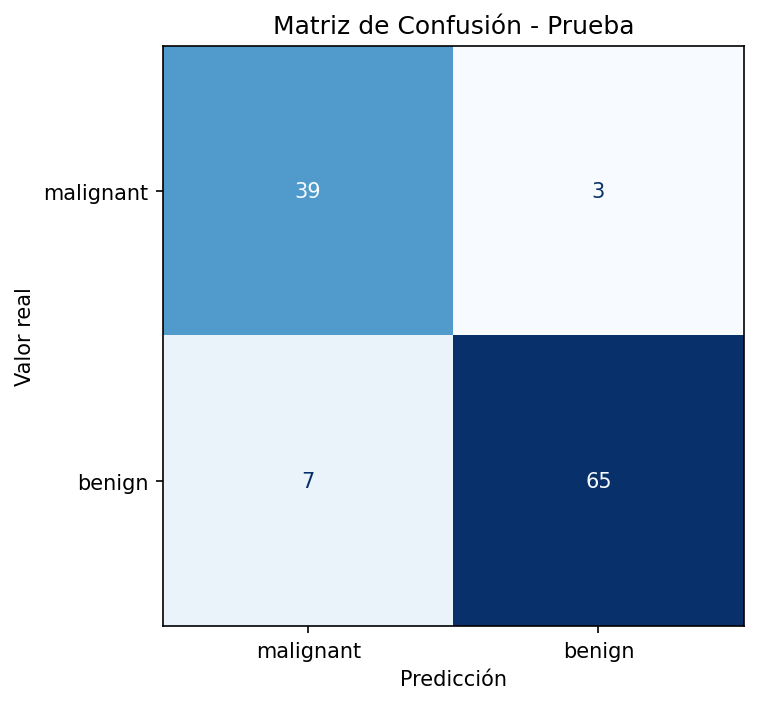

Precisión (accuracy) en prueba: 0.9123

Reporte de clasificación:
              precision    recall  f1-score   support

   malignant       0.85      0.93      0.89        42
      benign       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



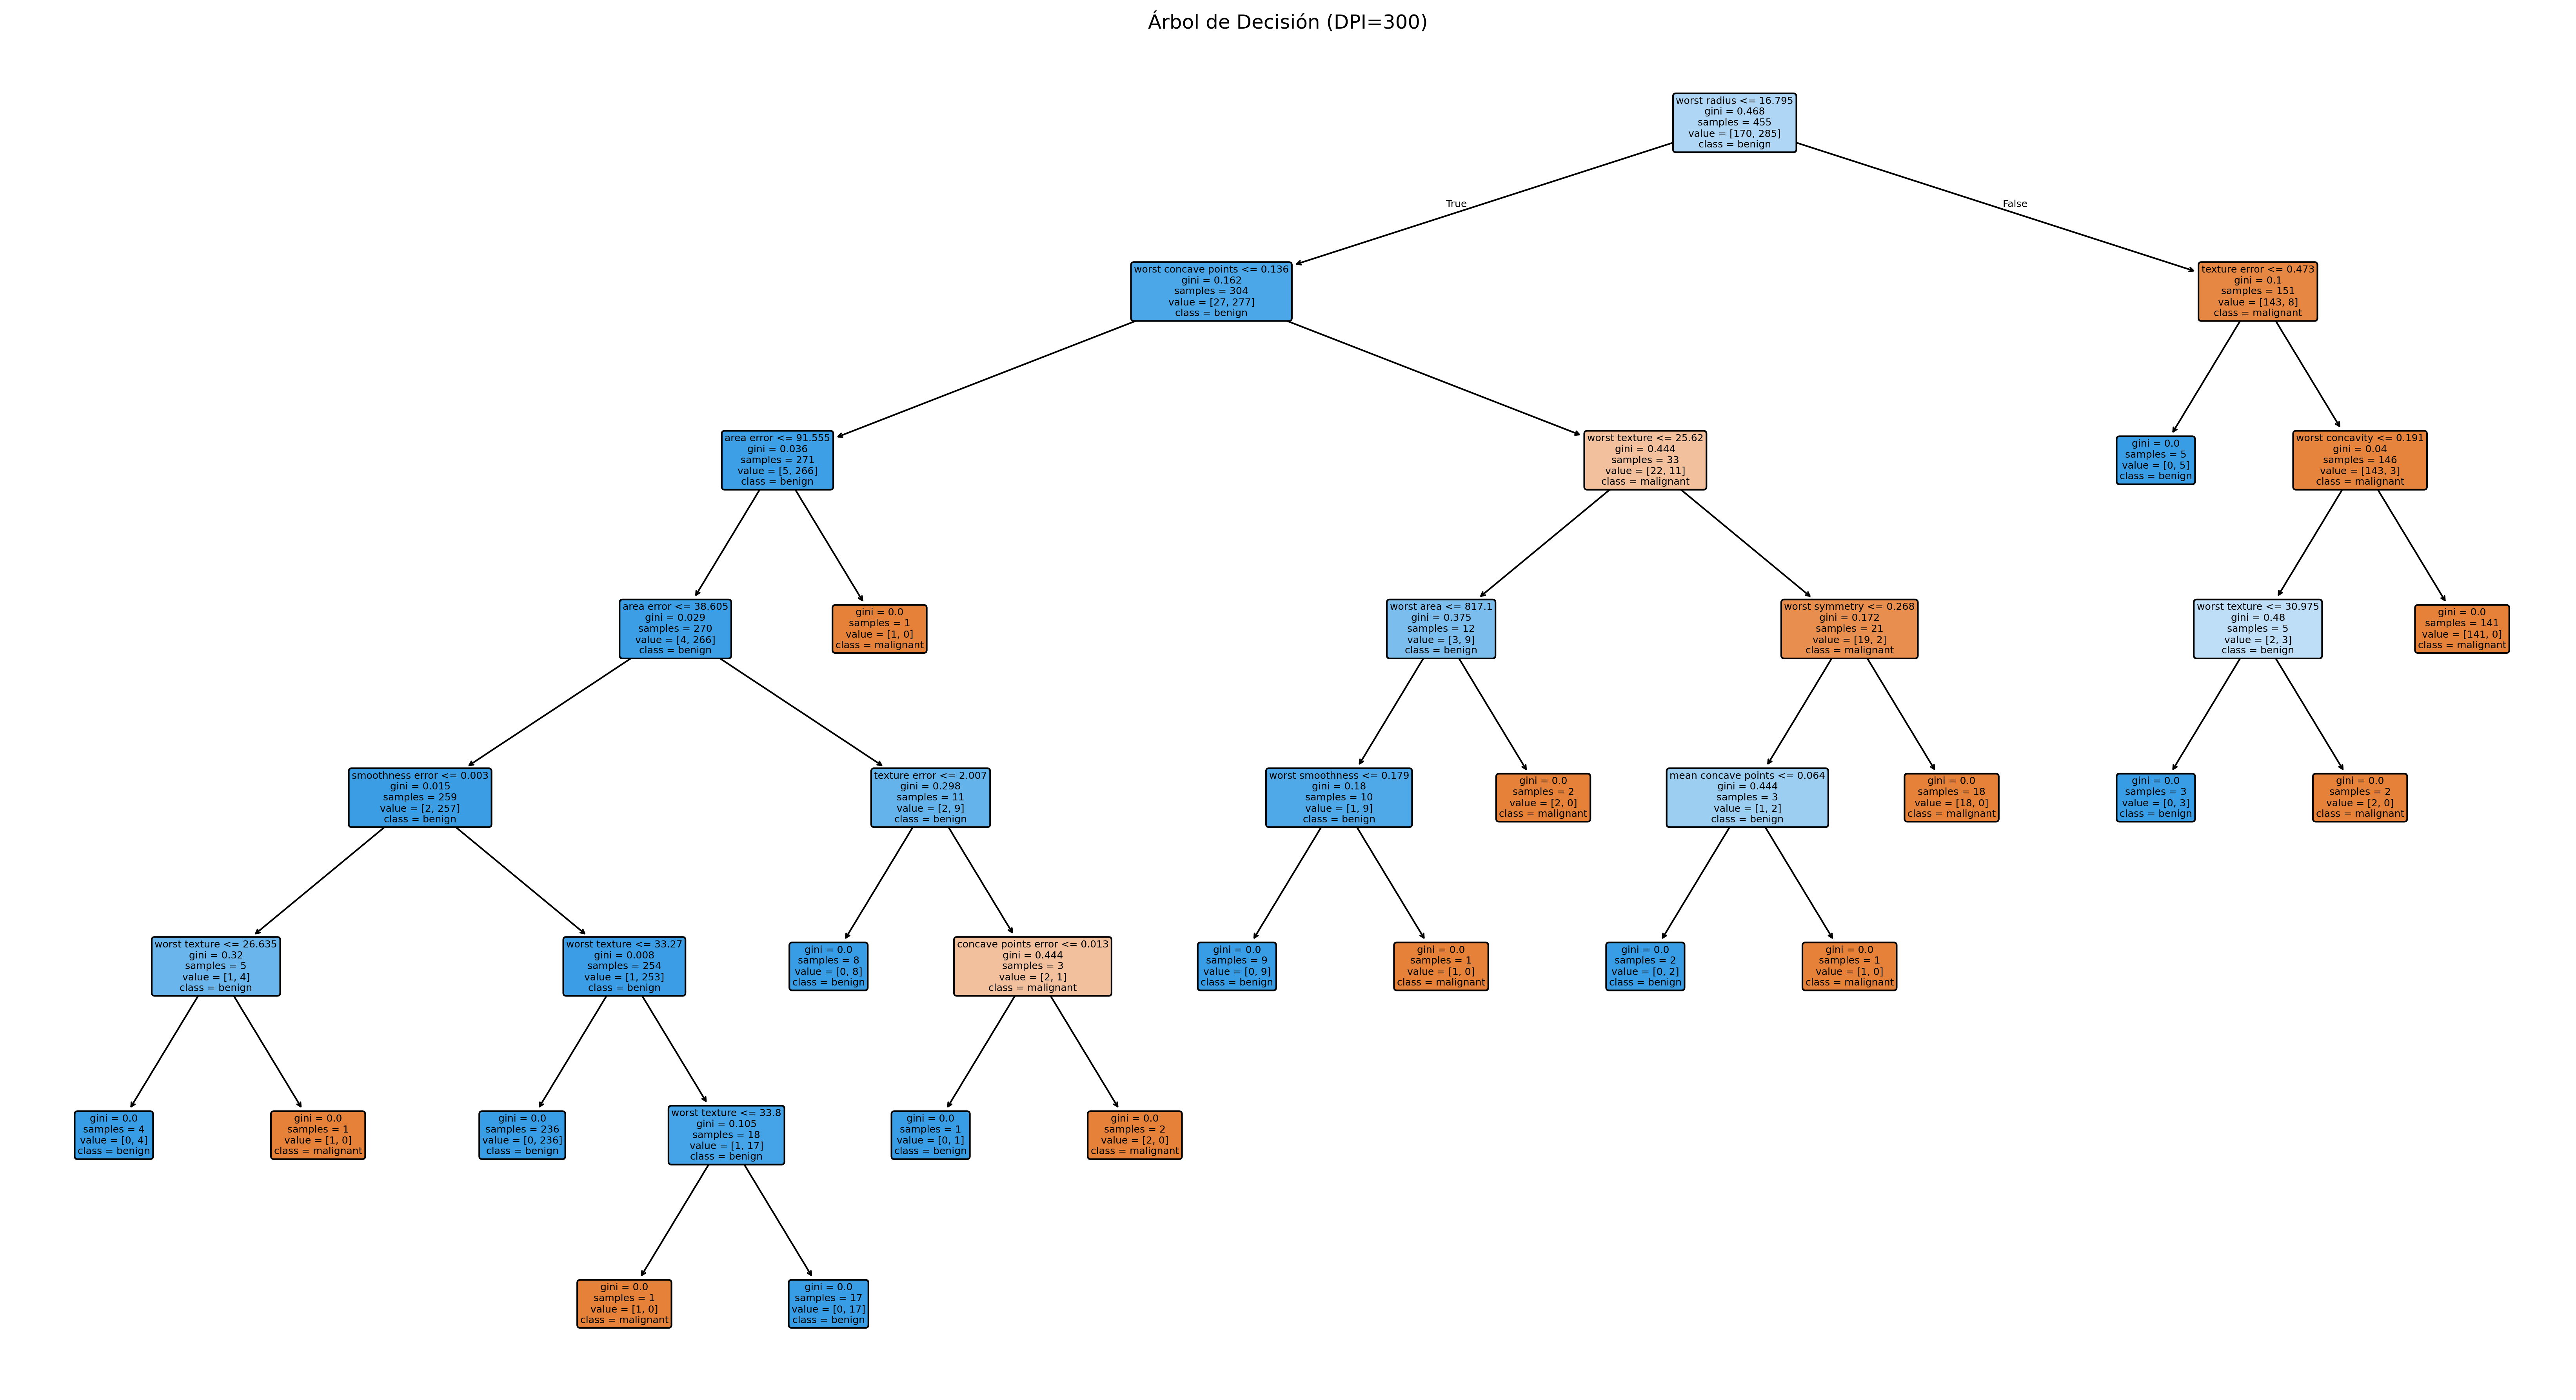

In [5]:
# ============================================
# 5) Prueba del modelo
#    - Predicciones
#    - Matriz de confusión
#    - Accuracy
#    - Classification report
#    - Visualización del árbol (DPI = 300)
# ============================================

# Predicciones en el conjunto de prueba
y_pred = clf.predict(test_data)

# Matriz de confusión
cm = confusion_matrix(test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

plt.figure(figsize=(5, 4), dpi=150)
disp.plot(cmap="Blues", values_format="d", colorbar=False)
plt.title("Matriz de Confusión - Prueba")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.tight_layout()
plt.show()

# Métricas
acc = accuracy_score(test_labels, y_pred)
print(f"Precisión (accuracy) en prueba: {acc:.4f}\n")

print("Reporte de clasificación:")
print(classification_report(test_labels, y_pred, target_names=target_names))

# Visualización del árbol con DPI = 300
plt.figure(figsize=(22, 12), dpi=300)
plot_tree(
    clf,
    filled=True,
    feature_names=feature_names,
    class_names=target_names,
    rounded=True,
    fontsize=6
)
plt.title("Árbol de Decisión (DPI=300)")
plt.tight_layout()
plt.show()
